In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [8]:
data15 = pd.read_csv('Data/WHR_2015.csv')
print(data15.head())


       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  
0     0.29678                    0.41978  
1     0.4363

In [9]:
print(data15.isnull().sum())

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64


In [10]:
print(data15.describe())

       happiness_score  gdp_per_capita  social_support  \
count       158.000000      158.000000      158.000000   
mean          5.375734        0.846137        0.991046   
std           1.145010        0.403121        0.272369   
min           2.839000        0.000000        0.000000   
25%           4.526000        0.545808        0.856823   
50%           5.232500        0.910245        1.029510   
75%           6.243750        1.158448        1.214405   
max           7.587000        1.690420        1.402230   

       healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
count               158.000000                    158.000000  158.000000   
mean                  0.630259                      0.428615    0.237296   
std                   0.247078                      0.150693    0.126685   
min                   0.000000                      0.000000    0.000000   
25%                   0.439185                      0.328330    0.150553   
50%                  

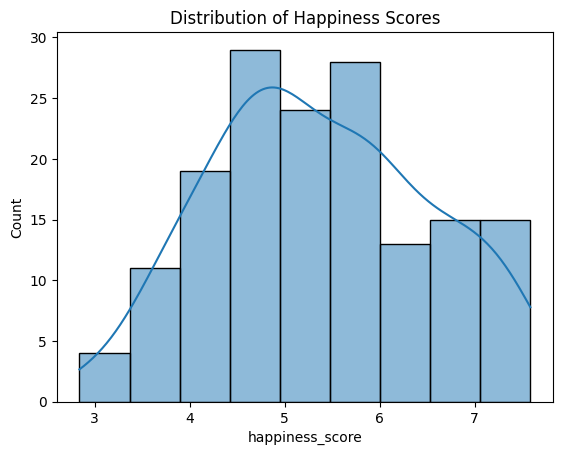

In [11]:


sns.histplot(data15['happiness_score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()

In [12]:
numeric_data15 = data15.select_dtypes(include=['float64'])
print(numeric_data15.head())

   happiness_score  gdp_per_capita  social_support  healthy_life_expectancy  \
0            7.587         1.39651         1.34951                  0.94143   
1            7.561         1.30232         1.40223                  0.94784   
2            7.527         1.32548         1.36058                  0.87464   
3            7.522         1.45900         1.33095                  0.88521   
4            7.427         1.32629         1.32261                  0.90563   

   freedom_to_make_life_choices  generosity  perceptions_of_corruption  
0                       0.66557     0.29678                    0.41978  
1                       0.62877     0.43630                    0.14145  
2                       0.64938     0.34139                    0.48357  
3                       0.66973     0.34699                    0.36503  
4                       0.63297     0.45811                    0.32957  


In [13]:
mean_happiness = data15['happiness_score'].mean()
median_happiness = data15['happiness_score'].median()

# Print the results
print(f"Mean Happiness Score: {mean_happiness:.2f}")
print(f"Median Happiness Score: {median_happiness:.2f}")

Mean Happiness Score: 5.38
Median Happiness Score: 5.23


In [14]:
# Sort by Happiness Score
top_happy = data15.sort_values(by='happiness_score', ascending=False).head(10)
least_happy = data15.sort_values(by='happiness_score', ascending=True).head(10)

# Display top 10 happiest countries
print("Top 10 Happiest Countries:")
print(top_happy[['country', 'happiness_score']])

# Display top 10 least happy countries
print("\nTop 10 Least Happy Countries:")
print(least_happy[['country', 'happiness_score']])


Top 10 Happiest Countries:
       country  happiness_score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427
5      Finland            7.406
6  Netherlands            7.378
7       Sweden            7.364
8  New Zealand            7.286
9    Australia            7.284

Top 10 Least Happy Countries:
          country  happiness_score
157          Togo            2.839
156       Burundi            2.905
155         Syria            3.006
154         Benin            3.340
153        Rwanda            3.465
152   Afghanistan            3.575
151  Burkina Faso            3.587
150   Ivory Coast            3.655
149        Guinea            3.656
148          Chad            3.667


In [15]:
correlation_matrix15 = numeric_data15.corr()
happines_corr = correlation_matrix15['happiness_score'].sort_values(ascending=False)

print(happines_corr)

happiness_score                 1.000000
gdp_per_capita                  0.780966
social_support                  0.740605
healthy_life_expectancy         0.724200
freedom_to_make_life_choices    0.568211
perceptions_of_corruption       0.395199
generosity                      0.180319
Name: happiness_score, dtype: float64


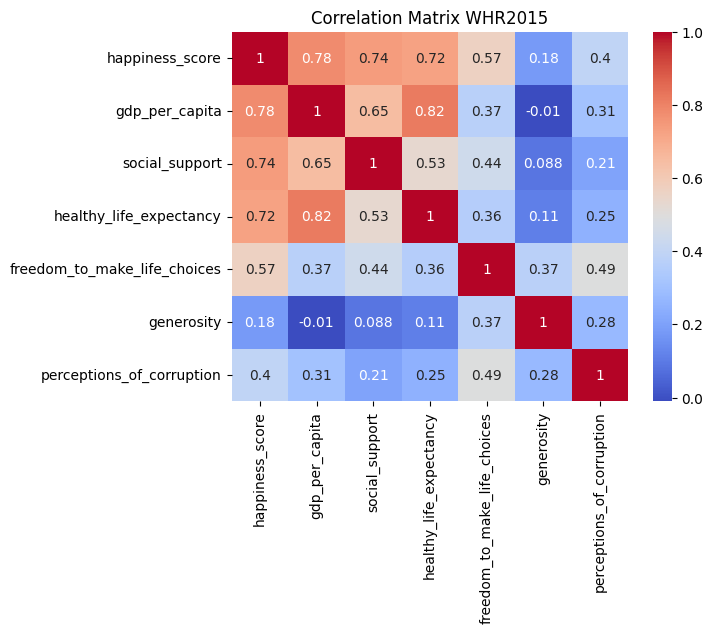

In [16]:
sns.heatmap(correlation_matrix15, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix WHR2015')
plt.show()

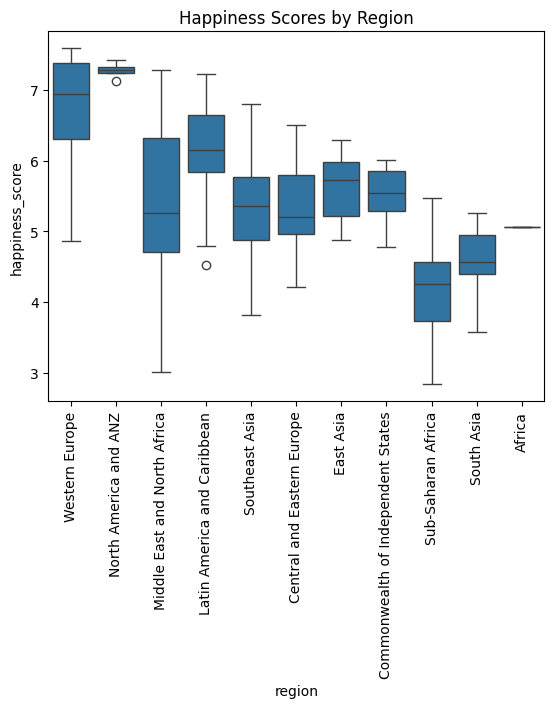

In [17]:
sns.boxplot(x='region', y='happiness_score', data=data15)
plt.xticks(rotation=90)
plt.title('Happiness Scores by Region')
plt.show()

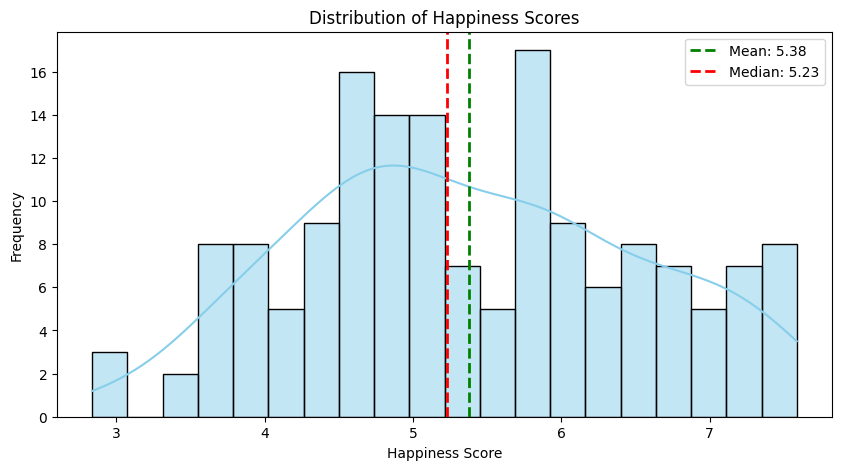

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data15['happiness_score'], kde=True, color='skyblue', bins=20)
plt.axvline(mean_happiness, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_happiness:.2f}')
plt.axvline(median_happiness, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_happiness:.2f}')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [19]:
#----------------USING ALL YEARS NOW---------------------------------------------

# File paths
file_paths = {
    2015: 'Data/WHR_2015.csv',
    2016: 'Data/WHR_2016.csv',
    2017: 'Data/WHR_2017.csv',
    2018: 'Data/WHR_2018.csv',
    2019: 'Data/WHR_2019.csv',
    2020: 'Data/WHR_2020.csv',
    2021: 'Data/WHR_2021.csv',
    2022: 'Data/WHR_2022.csv',
    2023: 'Data/WHR_2023.csv'
}

all_data = []

for year, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['year'] = year  # Adding the year as a column
    all_data.append(df)

# Concatenating all DataFrames
combined_data = pd.concat(all_data)
print(combined_data.head())

       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  


In [20]:
print(combined_data[['happiness_score', 'year']].head())

   happiness_score  year
0            7.587  2015
1            7.561  2015
2            7.527  2015
3            7.522  2015
4            7.427  2015


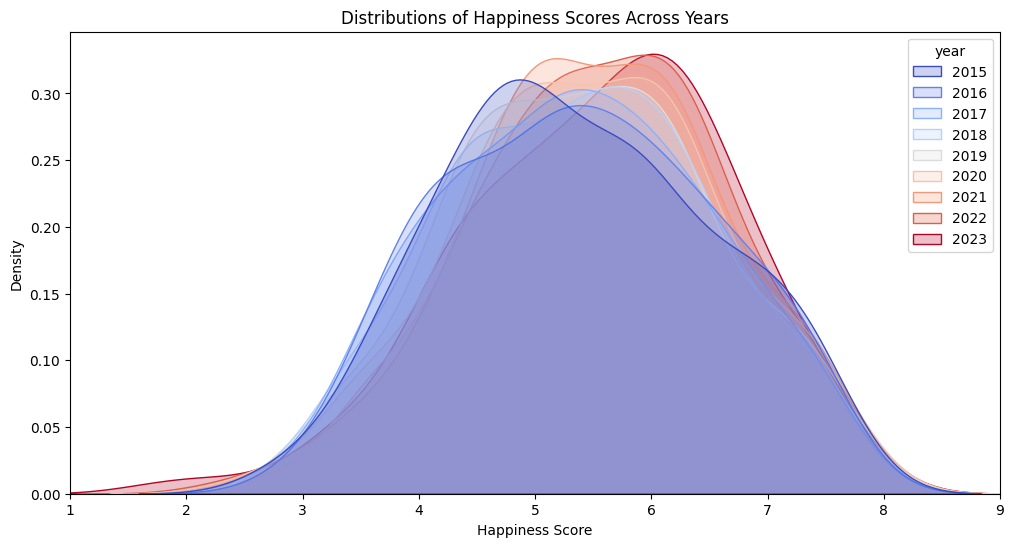

In [21]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=combined_data, x='happiness_score', hue='year', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distributions of Happiness Scores Across Years')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.xlim(1, 9)
plt.show()

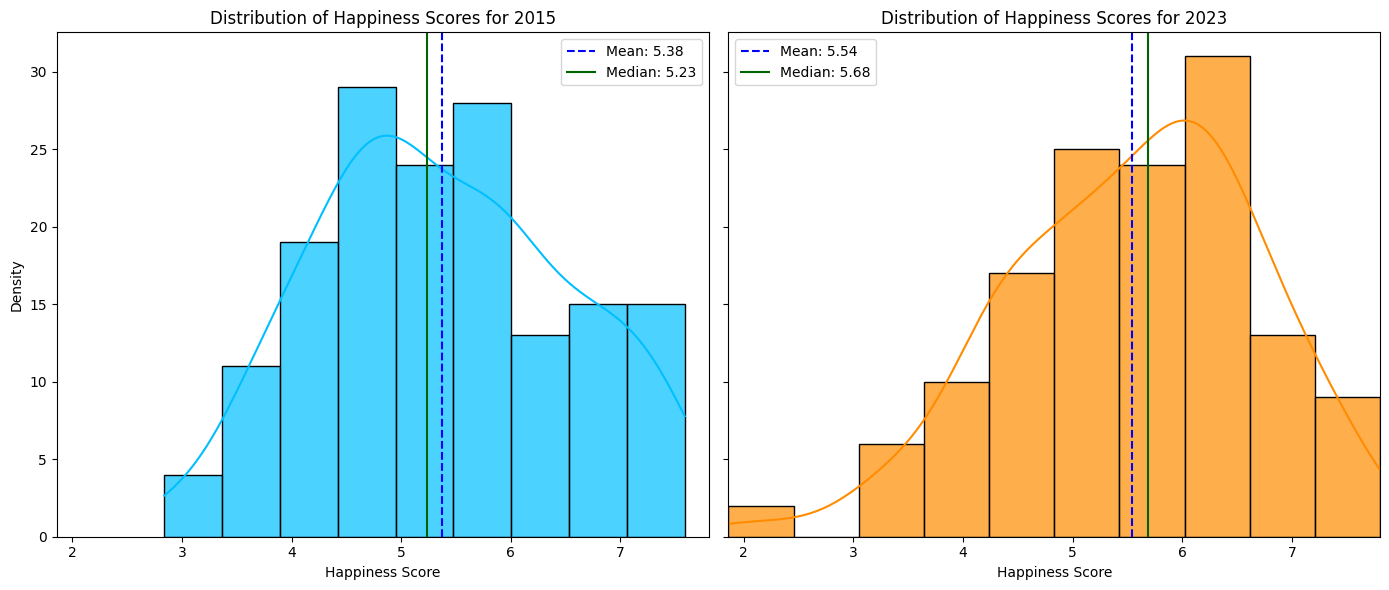

In [22]:
# Filter the data for 2015 and 2023
data_2015 = combined_data[combined_data['year'] == 2015]
data_2023 = combined_data[combined_data['year'] == 2023]

mean_2015 = data_2015['happiness_score'].mean()
median_2015 = data_2015['happiness_score'].median()

mean_2023 = data_2023['happiness_score'].mean()
median_2023 = data_2023['happiness_score'].median()

# Getting the minimum and maximum happiness_score for both years to ensure consistent x-axis limits
min_score = min(data_2015['happiness_score'].min(), data_2023['happiness_score'].min())
max_score = max(data_2015['happiness_score'].max(), data_2023['happiness_score'].max())

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=data_2015, x='happiness_score', kde=True, color='deepskyblue', alpha=0.7, ax=axes[0])
axes[0].axvline(mean_2015, color='blue', linestyle='--', label=f'Mean: {mean_2015:.2f}')
axes[0].axvline(median_2015, color='darkgreen', linestyle='-', label=f'Median: {median_2015:.2f}')
axes[0].set_title('Distribution of Happiness Scores for 2015')
axes[0].set_xlabel('Happiness Score')
axes[0].set_ylabel('Density')

axes[0].legend()


sns.histplot(data=data_2023, x='happiness_score', kde=True, color='darkorange', alpha=0.7, ax=axes[1])
axes[1].axvline(mean_2023, color='blue', linestyle='--', label=f'Mean: {mean_2023:.2f}')
axes[1].axvline(median_2023, color='darkgreen', linestyle='-', label=f'Median: {median_2023:.2f}')
axes[1].set_title('Distribution of Happiness Scores for 2023')
axes[1].set_xlabel('Happiness Score')
axes[1].legend()

axes[0].set_xlim(min_score, max_score)
axes[1].set_xlim(min_score, max_score)

plt.tight_layout()
plt.show()

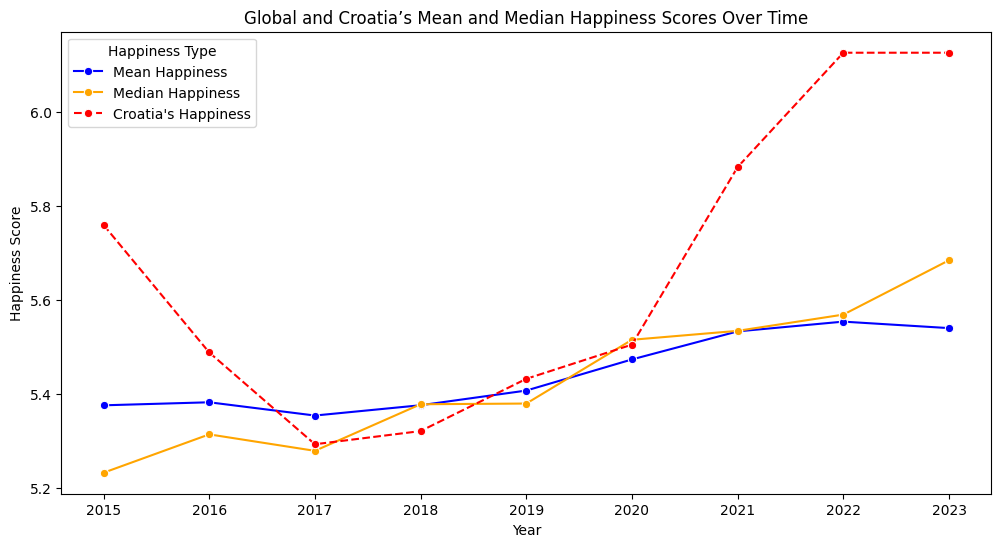

In [23]:

# Grouping by year and calculating the mean and median happiness score
happiness_by_year = combined_data.groupby('year')['happiness_score'].agg(['mean', 'median'])

croatia_data = combined_data[combined_data['country'] == 'Croatia']
croatia_by_year = croatia_data[['year', 'happiness_score']]

plt.figure(figsize=(12, 6))
sns.lineplot(x=happiness_by_year.index, y=happiness_by_year['mean'], label='Mean Happiness', color='blue', marker='o')
sns.lineplot(x=happiness_by_year.index, y=happiness_by_year['median'], label='Median Happiness', color='orange', marker='o')

sns.lineplot(x=croatia_by_year['year'], y=croatia_by_year['happiness_score'], label="Croatia's Happiness", color='red', marker='o', linestyle='--')

plt.title('Global and Croatia’s Mean and Median Happiness Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Happiness Score')

plt.legend(title='Happiness Type')

plt.show()


In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import geopandas as gpd

# # Download the dataset manually from the official source
# # This uses the updated data source link
# url = "https://www.naturalearthdata.com/downloads/110m-cultural-vectors/"
# world = gpd.read_file(url)

# # Calculate the mean happiness score per country
# mean_happiness = combined_data.groupby('country')['happiness_score'].mean().reset_index()

# # Merge the data with the world map
# merged = world.merge(mean_happiness, left_on='name', right_on='country', how='left')

# # Plot the map
# plt.figure(figsize=(16, 10))
# merged.plot(column='happiness_score',
#             cmap='Blues',
#             linewidth=0.8,
#             edgecolor='0.8',
#             legend=True)

# # Customize the map appearance
# plt.title('World Happiness Index (Darker = Happier)', fontsize=18)
# plt.axis('off')  # Remove axis for a cleaner look
# plt.show()


In [25]:
# Filtering data for 2023
data_2023 = combined_data[combined_data['year'] == 2023]

# Sorting the data by happiness_score in descending order to get the most happy countries
sorted_data_2023 = data_2023.sort_values(by='happiness_score', ascending=False)

top_10_happy_2023 = sorted_data_2023[['country', 'happiness_score']].head(10)

print("\nTop 10 Most Happy Countries in 2023:")
print(top_10_happy_2023)

# Grouping by country and calculate the medain happiness score for each country
median_happiness_by_country = combined_data.groupby('country')['happiness_score'].median()

sorted_median_happiness = median_happiness_by_country.sort_values(ascending=False)

top_10_happy = sorted_median_happiness.head(10)

print("\nTop 10 consistently happy countries (Highest median Happiness):")
print(top_10_happy)


Top 10 Most Happy Countries in 2023:
       country  happiness_score
0      Finland            7.804
1      Denmark            7.586
2      Iceland            7.530
3       Israel            7.473
4  Netherlands            7.403
5       Sweden            7.395
6       Norway            7.315
7  Switzerland            7.240
8   Luxembourg            7.228
9  New Zealand            7.123

Top 10 consistently happy countries (Highest median Happiness):
country
Finland        7.7690
Denmark        7.5860
Switzerland    7.5090
Iceland        7.5045
Norway         7.4980
Netherlands    7.4150
Sweden         7.3535
New Zealand    7.2996
Canada         7.2780
Australia      7.2280
Name: happiness_score, dtype: float64


In [26]:
top_10_least_happy_2023 = sorted_data_2023[['country', 'happiness_score']].tail(10).sort_values(by='happiness_score', ascending=True)

print("\nTop 10 Least Happy Countries in 2023:")
print(top_10_least_happy_2023)

top_10_least_happy = sorted_median_happiness.tail(10).sort_values(ascending=True)

print("\nTop 10 consistently least happy countries (Lowest median Happiness):")
print(top_10_least_happy)



Top 10 Least Happy Countries in 2023:
              country  happiness_score
136       Afghanistan            1.859
135           Lebanon            2.392
134      Sierra Leone            3.138
133          Zimbabwe            3.204
132  Congo (Kinshasa)            3.207
131          Botswana            3.435
130            Malawi            3.495
129           Comoros            3.545
128          Tanzania            3.694
127            Zambia            3.982

Top 10 consistently least happy countries (Lowest median Happiness):
country
Burundi                     2.9050
Central African Republic    3.0830
Afghanistan                 3.2030
South Sudan                 3.2540
Rwanda                      3.4115
Syria                       3.4620
Botswana                    3.4880
Malawi                      3.6000
Haiti                       3.6150
Tanzania                    3.6230
Name: happiness_score, dtype: float64


In [27]:
numeric_data = combined_data.select_dtypes(include=['float64'])

correlation_matrix = numeric_data.corr()
happines_corr = correlation_matrix['happiness_score'].sort_values(ascending=False)

print(happines_corr)

happiness_score                 1.000000
gdp_per_capita                  0.723810
healthy_life_expectancy         0.682400
social_support                  0.648155
freedom_to_make_life_choices    0.569458
perceptions_of_corruption       0.415071
generosity                      0.082345
Name: happiness_score, dtype: float64


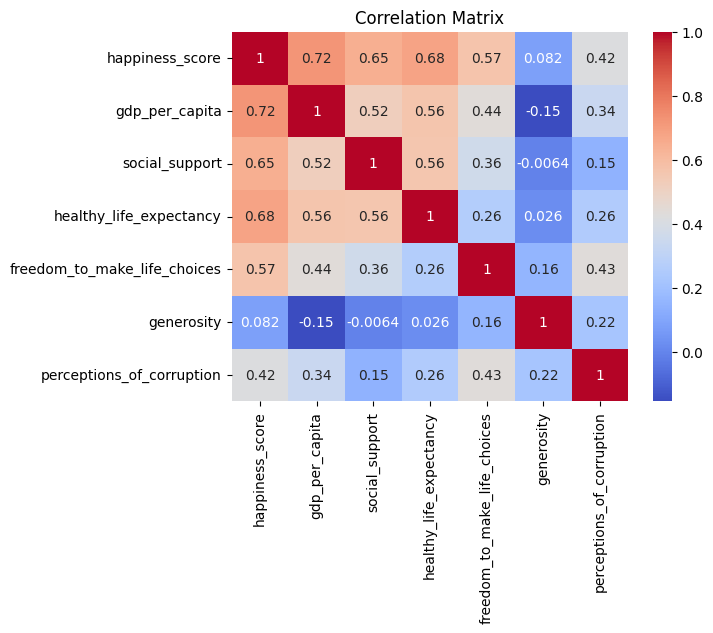

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

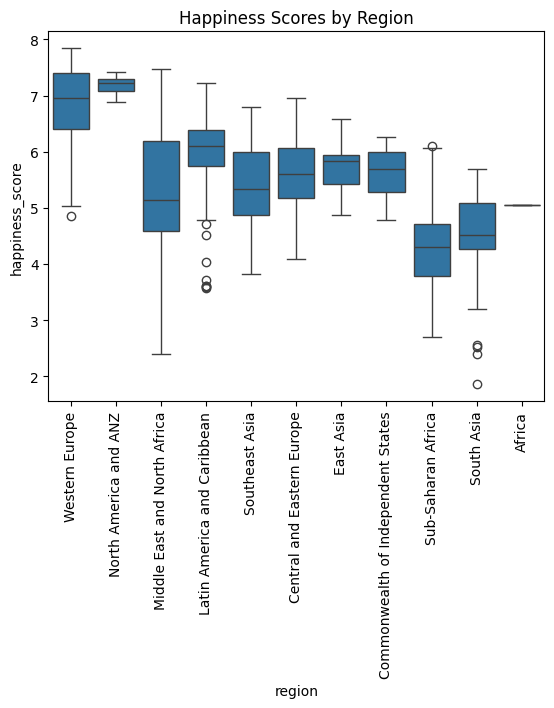

In [29]:
sns.boxplot(x='region', y='happiness_score', data=combined_data)
plt.xticks(rotation=90)
plt.title('Happiness Scores by Region')
plt.show()

In [30]:
# Defining a mapping from regions to continents
region_to_continent = {
    'Western Europe': 'Europe',
    'Central and Eastern Europe': 'Europe',
    'Southeast Asia': 'Asia',
    'East Asia': 'Asia',
    'South Asia': 'Asia',
    'Sub-Saharan Africa': 'Africa',
    'Middle East and North Africa': 'Africa',
    'Latin America and Caribbean': 'South America'
}

# Special handling for "North America and ANZ"
def assign_continent(row):
    if row['region'] == 'North America and ANZ':
        if row['country'] in ['United States', 'Canada']:  # Countries in North America
            return 'North America'
        elif row['country'] in ['Australia', 'New Zealand']:  # Countries in Oceania
            return 'Oceania'
    # Default mapping for other regions
    return region_to_continent.get(row['region'], 'Unknown')

# Apply the logic to create a 'continent' column
combined_data['continent'] = combined_data.apply(assign_continent, axis=1)

# Check the result
print(combined_data[['country', 'region', 'continent']].drop_duplicates())


                country                        region      continent
0           Switzerland                Western Europe         Europe
1               Iceland                Western Europe         Europe
2               Denmark                Western Europe         Europe
3                Norway                Western Europe         Europe
4                Canada         North America and ANZ  North America
..                  ...                           ...            ...
17              Czechia    Central and Eastern Europe         Europe
98                Congo            Sub-Saharan Africa         Africa
124            Eswatini            Sub-Saharan Africa         Africa
98   State of Palestine  Middle East and North Africa         Africa
105             Turkiye  Middle East and North Africa         Africa

[171 rows x 3 columns]


In [31]:
# plt.figure(figsize=(8, 8))
# sns.boxplot(data=combined_data, y='happiness_score', x='continent', hue='continent', dodge=False, palette='Set2', legend=False)

# plt.title('Happiness Score Distribution by Continent', fontsize=16)
# plt.xlabel('Continent', fontsize=12)
# plt.ylabel('Happiness Score', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


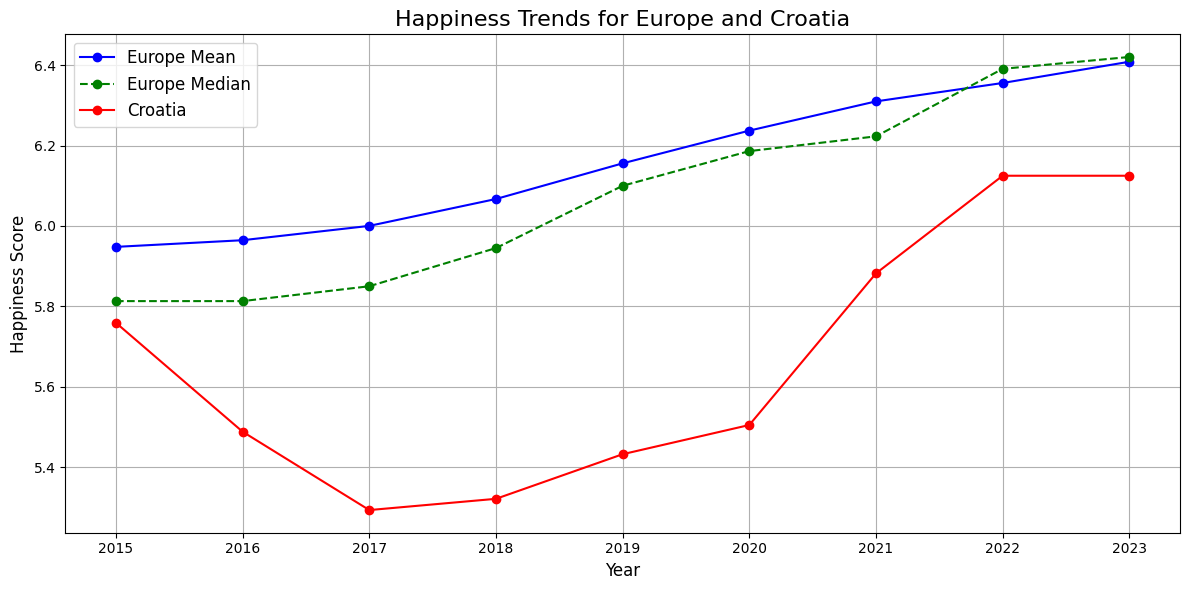

In [32]:

# Filter the dataset for Europe
europe_data = combined_data[combined_data['continent'] == 'Europe']

# Calculate mean and median happiness scores for Europe by year
europe_mean = europe_data.groupby('year')['happiness_score'].mean()
europe_median = europe_data.groupby('year')['happiness_score'].median()

# Filter the dataset for Croatia
croatia_data = combined_data[combined_data['country'] == 'Croatia']
croatia_scores = croatia_data[['year', 'happiness_score']].set_index('year')

# Plot the chart
plt.figure(figsize=(12, 6))

# Plot Europe mean and median
plt.plot(europe_mean.index, europe_mean.values, label='Europe Mean', marker='o', linestyle='-', color='blue')
plt.plot(europe_median.index, europe_median.values, label='Europe Median', marker='o', linestyle='--', color='green')

# Plot Croatia happiness scores
plt.plot(croatia_scores.index, croatia_scores['happiness_score'], label='Croatia', marker='o', linestyle='-', color='red')

# Add labels, title, and legend
plt.title('Happiness Trends for Europe and Croatia', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
missing_values = combined_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
continent                       0
dtype: int64


In [34]:

# Display basic info to ensure data structure is correct
#print(combined_data.info())

# Features and Target Variable Selection
features = [
    'gdp_per_capita', 
    'social_support', 
    'healthy_life_expectancy', 
    'freedom_to_make_life_choices', 
    'generosity', 
    'perceptions_of_corruption'
]

target = 'happiness_score'

# Drop rows where either features or target are missing
data_cleaned = combined_data.dropna(subset=features + [target])
#print(f"Cleaned data:{data_cleaned}")
# Prepare X and y ensuring proper alignment
X = data_cleaned[features]
y = data_cleaned[target]

# Confirm shapes to avoid mismatch error
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data for training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Convert MSE to RMSE
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# Save the trained model using joblib
# import joblib
# joblib.dump(rf_model, 'happiness_rf_model.pkl')
# print("Model has been saved successfully!")


Shape of X: (1365, 6)
Shape of y: (1365,)
R² Score: 0.787
Root Mean Squared Error (RMSE): 0.512


In [35]:
# Prediction
new_data = [[1.3, 1.2, 0.9, 0.6, 0.2, 0.4]]  # log GDP, social_support, healthy_life_expectancy', 
#'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption'

predicted_score = rf_model.predict(new_data)
print(f"Predicted Happiness Score: {predicted_score[0]:.2f}")

Predicted Happiness Score: 7.41


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7939 - val_loss: 0.6783
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5626 - val_loss: 0.5475
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5171 - val_loss: 0.4528
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4025 - val_loss: 0.3892
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3613 - val_loss: 0.3405
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3476 - val_loss: 0.3065
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3378 - val_loss: 0.2834
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3069 - val_loss: 0.2660
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2963 - val_loss: 0.2547
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2851 - val_loss: 0.2455
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2819 - val_loss: 0.2389
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

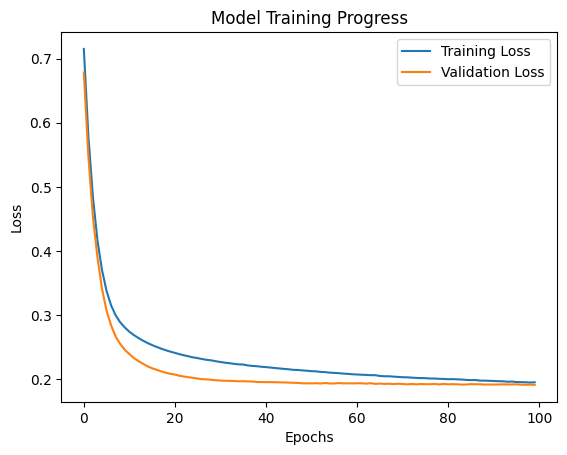

In [36]:
# Standardize the data (important for neural networks)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for predicting happiness score

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model with a progress bar and early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_scaled, 
                    epochs=100, batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

# Make predictions and inverse transform
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Evaluate model performance
r2 = r2_score(y_test_original, y_pred)
print(f"R² Score: {r2:.2f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Training Progress')
plt.show()


In [37]:
custom_input = np.array([[1.3, 1.2, 0.9, 0.6, 0.2, 0.4]])  # Adjust these values

# Scale the custom input using the same scaler
custom_input_scaled = scaler_X.transform(custom_input)

predicted_scaled = model.predict(custom_input_scaled)

# Convert the prediction back to the original scale
predicted_happiness = scaler_y.inverse_transform(predicted_scaled)

print(f"Predicted Happiness Score: {predicted_happiness[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Happiness Score: 6.82


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Reverse the data: happiness_score as input, other features as targets
X_reverse = data_cleaned[['happiness_score']]
y_reverse = data_cleaned[['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reverse, y_reverse, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for Multi-Output Regression
rf_reverse = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reverse.fit(X_train, y_train)

# Example Prediction: Input a Happiness Score
happiness_input = [[7.5]]  # Replace with your desired happiness score
predicted_features = rf_reverse.predict(happiness_input)

# Display Results
print("Predicted Features for Happiness Score 7.5:")
for feature, value in zip(y_reverse.columns, predicted_features[0]):
    print(f"{feature}: {value:.2f}")


Predicted Features for Happiness Score 7.5:
gdp_per_capita: 1.47
social_support: 1.22
healthy_life_expectancy: 0.85
freedom_to_make_life_choices: 0.58
generosity: 0.45
perceptions_of_corruption: 0.20


c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select features (independent variables) and target variable (dependent variable)
X = data_cleaned[['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 
        'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]
y = data_cleaned['happiness_score']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPRegressor model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)
mae = mean_absolute_error(y_test, y_pred_nn)

# Print evaluation metrics
print("Neural Network R² Score:", r2)
print("Neural Network Mean Squared Error (MSE):", mse)
print("Neural Network Mean Absolute Error (MAE):", mae)


Neural Network R² Score: 0.7862469770110629
Neural Network Mean Squared Error (MSE): 0.262023502564395
Neural Network Mean Absolute Error (MAE): 0.3956036531937322


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


# Drop non-numeric columns and separate features/target
X = data_cleaned.drop(columns=['country', 'region', 'year', 'continent', 'happiness_score'])
y = data_cleaned['happiness_score']


# Standardize features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator from the grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Save the model
# import joblib
# joblib.dump(best_model, 'best_happiness_model.pkl')
# print("Model saved successfully!")


Best R² Score: 0.7869
Mean Squared Error (MSE): 0.2612
Root Mean Squared Error (RMSE): 0.5111
Mean Absolute Error (MAE): 0.4039


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
#Drop non-numeric columns and separate features/target
#
data_cleaned_test = pd.read_csv('Data\WHR_2022.csv')
X0 = data_cleaned_test.drop(columns=['country'])
X0['region']=e.fit_transform(X0['region'])
from scipy.stats import zscore
z=np.abs(zscore(X0))
X0=X0[(z<3).all(axis=1)]

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X0pt=pt.fit_transform(X0)
X0=pd.DataFrame(X0pt,columns=X0.columns)

X = X0.drop(columns=['happiness_score'])

y = X0['happiness_score']

# Standardize features for better performance
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

s=MinMaxScaler()
xs=s.fit_transform(X)
X_scaled=pd.DataFrame(xs,columns=X.columns)
X_scaled.head()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(X_train,y_train)
    p=m.predict(X_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

for i in models:
    create_model(i)

print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

<>:18: SyntaxWarning: invalid escape sequence '\W'
<>:18: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Mate\AppData\Local\Temp\ipykernel_24740\4095492890.py:18: SyntaxWarning: invalid escape sequence '\W'
  data_cleaned_test = pd.read_csv('Data\WHR_2022.csv')


KNeighborsRegressor()
Mean absolute error 0.38835301007705336
Mean squared error 0.2566641956240557
Root Mean squared error 0.5066203663731411
R2 Score 0.7174608067801723
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.3314247439452575
Mean squared error 0.17995021618693874
Root Mean squared error 0.4242053938682755
R2 Score 0.8019085257389675
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.5253070009850755
Mean squared error 0.4606092607616966
Root Mean squared error 0.6786820026799714
R2 Score 0.49295549927107296
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.3777883063891574
Mean squared error 0.23021163395135993
Root Mean squared error 0.4798037452452408
R2 Score 0.7465801212814767
---------------

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
#Drop non-numeric columns and separate features/target
#
df = pd.read_csv('./Data/test2015.csv')
print(df.shape)
df.drop(['Country','Happiness Rank'],axis=1,inplace=True)
df.shape

df['Region']=e.fit_transform(df['Region'])
df.head()

# from scipy.stats import zscore
# z=np.abs(zscore(df))
# df=df[(z<3).all(axis=1)]

# from sklearn.preprocessing import PowerTransformer
# pt=PowerTransformer()
# dfpt=pt.fit_transform(df)
# df=pd.DataFrame(dfpt,columns=df.columns)

y=df['Happiness Score']
x=df.copy()
x.drop('Happiness Score',axis=1,inplace=True)

print(x.head())
print(y.head())

from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()

xs=s.fit_transform(x)
x=pd.DataFrame(xs,columns=x.columns)
x.head()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

for i in models:
        create_model(i)

print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

(158, 12)
   Region  Standard Error  Economy (GDP per Capita)   Family  \
0       9         0.03411                   1.39651  1.34951   
1       9         0.04884                   1.30232  1.40223   
2       9         0.03328                   1.32548  1.36058   
3       9         0.03880                   1.45900  1.33095   
4       5         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  
0     0.29678  
1     0.43630  
2     0.34139  
3     0.34699  
4     0.45811  
0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtyp

In [42]:

X = data_cleaned[['happiness_score']]  # Input feature: happiness_score
y_gdp = data_cleaned['gdp_per_capita']  # Target: gdp_per_capita
y_social_support = data_cleaned['social_support']  # Target: social_support
y_life_expectancy = data_cleaned['healthy_life_expectancy']  # Target: healthy_life_expectancy
y_freedom = data_cleaned['freedom_to_make_life_choices']  # Target: freedom_to_make_life_choices
y_generosity = data_cleaned['generosity']  # Target: generosity
y_perceptions_of_corruption = data_cleaned['perceptions_of_corruption']  # Target: perceptions_of_corruption

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data for GDP prediction
X_train, X_test, y_train_gdp, y_test_gdp = train_test_split(X, y_gdp, test_size=0.2, random_state=42)

# Standardize the features (happiness score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Neural Network model
nn_model_gdp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model_gdp.fit(X_train_scaled, y_train_gdp)

# Predict GDP per capita based on happiness score
y_pred_gdp = nn_model_gdp.predict(X_test_scaled)

# Evaluate the model for GDP prediction
r2_gdp = r2_score(y_test_gdp, y_pred_gdp)
mse_gdp = mean_squared_error(y_test_gdp, y_pred_gdp)
mae_gdp = mean_absolute_error(y_test_gdp, y_pred_gdp)

print("GDP Prediction:")
print("R² Score:", r2_gdp)
print("Mean Squared Error:", mse_gdp)
print("Mean Absolute Error:", mae_gdp)


GDP Prediction:
R² Score: 0.5594282060559379
Mean Squared Error: 0.0919249319763966
Mean Absolute Error: 0.23793760076058523


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is called df
X = data_cleaned[['happiness_score']]  # Input feature: happiness_score
y = data_cleaned[['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
        'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]  # Multiple target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base model (MLPRegressor)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Initialize the MultiOutputRegressor with the MLPRegressor as the base model
multi_output_model = MultiOutputRegressor(mlp_model)

# Train the model
multi_output_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = multi_output_model.predict(X_test_scaled)

# Evaluate performance for each target variable
r2_scores = {}
mse_scores = {}
mae_scores = {}

# For each target variable
for i, column in enumerate(y.columns):
    r2_scores[column] = r2_score(y_test.iloc[:, i], y_pred[:, i])
    mse_scores[column] = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    mae_scores[column] = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])

# Print out the results
print("R² Scores:")
print(r2_scores)

print("\nMean Squared Errors (MSE):")
print(mse_scores)

print("\nMean Absolute Errors (MAE):")
print(mae_scores)

# Input the happiness score for prediction (e.g., happiness_score = 7.5)
happiness_input = pd.DataFrame([[7.5]], columns=['happiness_score'])

# Standardize the input using the same scaler
happiness_input_scaled = scaler.transform(happiness_input)

# Predict the other features
predicted_values = multi_output_model.predict(happiness_input_scaled)

# Show the predicted values for each feature
predicted_df = pd.DataFrame(predicted_values, columns=y.columns)
print(predicted_df)



R² Scores:
{'gdp_per_capita': 0.5594282060559379, 'social_support': 0.33638766331260095, 'healthy_life_expectancy': 0.44705428590013385, 'freedom_to_make_life_choices': 0.2836987158187724, 'generosity': 0.032182458995310914, 'perceptions_of_corruption': 0.319011401253697}

Mean Squared Errors (MSE):
{'gdp_per_capita': 0.0919249319763966, 'social_support': 0.0744668069165095, 'healthy_life_expectancy': 0.03206281211666333, 'freedom_to_make_life_choices': 0.017020250379053314, 'generosity': 0.011385004473111715, 'perceptions_of_corruption': 0.0077394993830068644}

Mean Absolute Errors (MAE):
{'gdp_per_capita': 0.23793760076058523, 'social_support': 0.2183692326889104, 'healthy_life_expectancy': 0.1394869290550934, 'freedom_to_make_life_choices': 0.10417568021763225, 'generosity': 0.07814809178927774, 'perceptions_of_corruption': 0.063966859915118}
   gdp_per_capita  social_support  healthy_life_expectancy  \
0        1.604346        1.431359                 0.901736   

   freedom_to_mak

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Prepare the data
X = data_cleaned[['happiness_score']]
y = data_cleaned.drop(columns=['country', 'region', 'year', 'continent', 'happiness_score'])

# Standardize the input
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)  # Scale both inputs and outputs

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1])  # Number of output nodes matches number of target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

# Print evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Predict on new data (for demonstration)
new_happiness_score = [[5]]  # Example input
new_happiness_score_scaled = scaler_X.transform(new_happiness_score)
predicted_outputs_scaled = model.predict(new_happiness_score_scaled)

# Inverse transform to get original scale predictions
predicted_outputs = scaler_y.inverse_transform(predicted_outputs_scaled)
print("Predicted Outputs:", predicted_outputs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9068 - mae: 0.7574 - val_loss: 0.7512 - val_mae: 0.6810
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6896 - mae: 0.6553 - val_loss: 0.6675 - val_mae: 0.6391
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6630 - mae: 0.6468 - val_loss: 0.6556 - val_mae: 0.6308
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6423 - mae: 0.6339 - val_loss: 0.6528 - val_mae: 0.6292
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6354 - mae: 0.6239 - val_loss: 0.6479 - val_mae: 0.6245
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6707 - mae: 0.6351 - val_loss: 0.6428 - val_mae: 0.6216
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5966 - mae: 0.6063 - val_loss: 0.6411 - val_mae: 0.6195
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6270 - mae: 0.6215 - val_loss: 0.6393 - val_mae: 0.6178
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.61

c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
# Predict on new data (for demonstration)
new_happiness_score = [[6]]  # Example input
new_happiness_score_scaled = scaler_X.transform(new_happiness_score)
predicted_outputs_scaled = model.predict(new_happiness_score_scaled)

# Inverse transform to get original scale predictions
predicted_outputs = scaler_y.inverse_transform(predicted_outputs_scaled)
print("Predicted Outputs:", predicted_outputs)

c:\Users\Mate\Documents\FESB 4.god\uvod u podatkovnu znanost\Projekti\World happiness analysis\WHR\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Outputs: [[1.1976771  1.188068   0.68075824 0.49461994 0.1555561  0.08588552]]


In [46]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and test data back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Calculate R² score for each target variable
r2_scores = {}
for i, col in enumerate(y.columns):
    r2_scores[col] = r2_score(y_test_original[:, i], y_pred[:, i])

print("R² Scores:", r2_scores)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² Scores: {'gdp_per_capita': 0.5469289268812121, 'social_support': 0.3717709987562057, 'healthy_life_expectancy': 0.47567524508281755, 'freedom_to_make_life_choices': 0.28823418016778324, 'generosity': 0.03711306841154083, 'perceptions_of_corruption': 0.3303893699365268}
